##REGRESSION ANALYSIS





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [ ]:
#read.csv - to read csv file in python
df=pd.read_csv('/content/bike data.csv')
df
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Data Preprocessing

In [ ]:
#Shape-used to know the dimensions of dataframe
df.shape


(17379, 17)

In [ ]:
#Checking for the  NaN values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#Checking for the missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#info() - used to get a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#describe() - used to calculate statistial data of the numerical values of dataframe
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
#Checking for the duplicate values
df.duplicated().sum()

0

### **Here ,we divide the range of values of  numerical variables into a set of intervals or bins and then assign a categorical label to each bin,so that we can create plots/graphs.**

In [ ]:
df['season'] = pd.cut(df['season'], bins=4, labels=['winter', 'spring', 'summer', 'fall'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df['yr']=pd.cut(df['yr'],bins=2,labels=['2011','2012'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,winter,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,winter,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,winter,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,winter,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,winter,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df['mnth']=pd.cut(df['mnth'],bins=12,labels=['January','Febuary','March','April','May','june','July','August','September','October','November','December'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,winter,2011,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,winter,2011,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,winter,2011,January,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,winter,2011,January,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,winter,2011,January,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df['holiday']=pd.cut(df['holiday'],bins=2,labels=['Not a holiday','Holiday'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,winter,2011,January,0,Not a holiday,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,winter,2011,January,1,Not a holiday,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,winter,2011,January,2,Not a holiday,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,winter,2011,January,3,Not a holiday,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,winter,2011,January,4,Not a holiday,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df['weathersit'] = pd.cut(df['weathersit'], bins=4, labels=['Clear', 'Mist', 'Light Snow', 'Heavy Rain'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,winter,2011,January,0,Not a holiday,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,winter,2011,January,1,Not a holiday,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,winter,2011,January,2,Not a holiday,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,winter,2011,January,3,Not a holiday,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,winter,2011,January,4,Not a holiday,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df['workingday']=pd.cut(df['workingday'],bins=2,labels=['Holiday/Weekend','Working day'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,winter,2011,January,0,Not a holiday,6,Holiday/Weekend,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,winter,2011,January,1,Not a holiday,6,Holiday/Weekend,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,winter,2011,January,2,Not a holiday,6,Holiday/Weekend,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,winter,2011,January,3,Not a holiday,6,Holiday/Weekend,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,winter,2011,January,4,Not a holiday,6,Holiday/Weekend,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df['weekday']=pd.cut( df['weekday'],bins=7,labels=['sunday','monday','tuesday','wednesday','thursday','friday','saturday'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,winter,2011,January,0,Not a holiday,saturday,Holiday/Weekend,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,winter,2011,January,1,Not a holiday,saturday,Holiday/Weekend,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,winter,2011,January,2,Not a holiday,saturday,Holiday/Weekend,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,winter,2011,January,3,Not a holiday,saturday,Holiday/Weekend,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,winter,2011,January,4,Not a holiday,saturday,Holiday/Weekend,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,winter,2011,January,0,Not a holiday,saturday,Holiday/Weekend,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,winter,2011,January,1,Not a holiday,saturday,Holiday/Weekend,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,winter,2011,January,2,Not a holiday,saturday,Holiday/Weekend,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,winter,2011,January,3,Not a holiday,saturday,Holiday/Weekend,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,winter,2011,January,4,Not a holiday,saturday,Holiday/Weekend,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,winter,2012,December,19,Not a holiday,monday,Working day,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,12/31/2012,winter,2012,December,20,Not a holiday,monday,Working day,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,12/31/2012,winter,2012,December,21,Not a holiday,monday,Working day,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,12/31/2012,winter,2012,December,22,Not a holiday,monday,Working day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


# **Exploratory Data Analysis (EDA)**








## **1.**    **Multivariate Analysis**




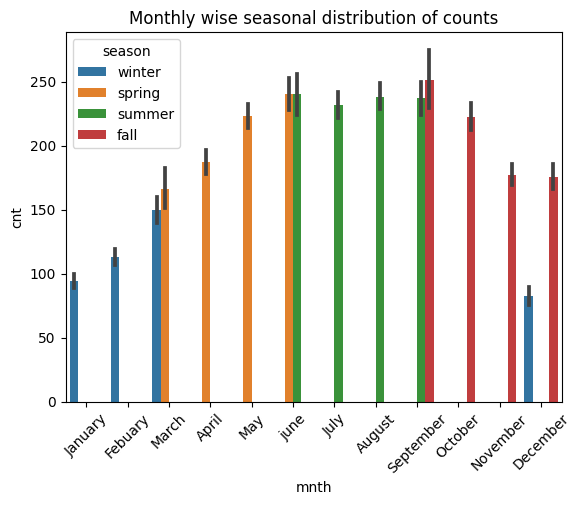

In [ ]:
sb.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','season']],hue='season')
plt.xticks(rotation=45)
plt.title('Monthly wise seasonal distribution of counts')
plt.show()

*   **The above barplot gives us the idea about monthly wise seasonal distribution of counts of rental bikes.**




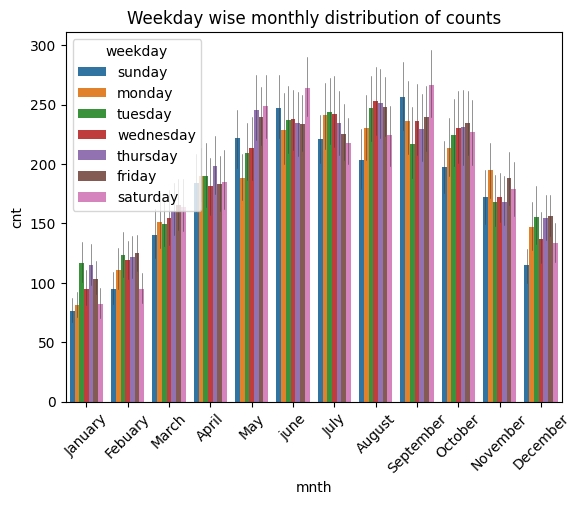

<Figure size 1200x1200 with 0 Axes>

In [ ]:
sb.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','weekday']],hue='weekday',errwidth=0.4)
plt.title('Weekday wise monthly distribution of counts')
plt.xticks(rotation=45)
plt.figure(figsize =(12, 12))
plt.show()

*   **The above barplot gives us the idea about Weekday wise monthly distribution of  counts of rental bikes.**

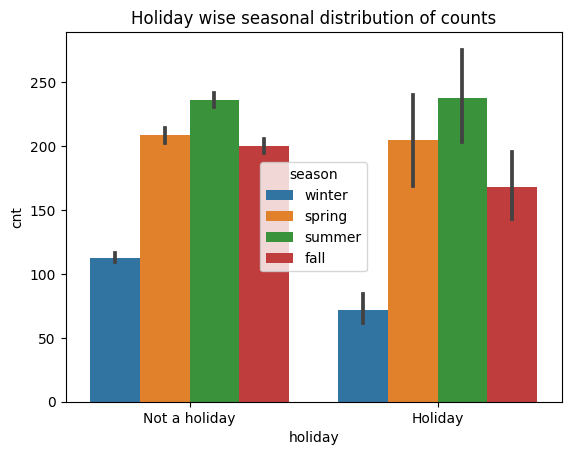

<Figure size 1200x1200 with 0 Axes>

In [ ]:
sb.barplot(data=df,x='holiday',y='cnt',hue='season')
plt.title('Holiday wise seasonal distribution of counts')
plt.figure(figsize =(12, 12))
plt.show()

*   **The above barplot gives us the idea about Holiday wise seasonal distribution of counts of rental bikes.**

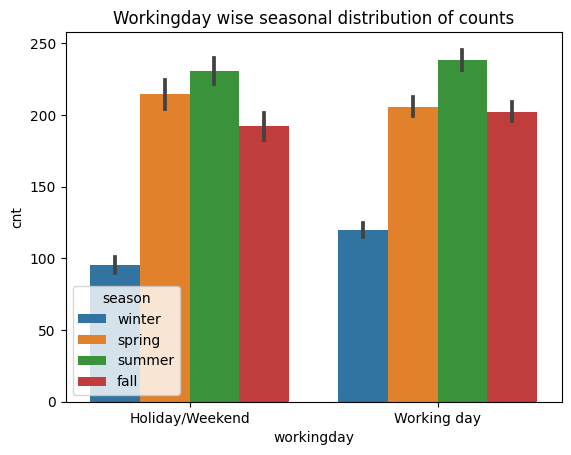

<Figure size 1200x1200 with 0 Axes>

In [ ]:
sb.barplot(data=df,x='workingday',y='cnt',hue='season')
plt.title('Workingday wise seasonal distribution of counts')
plt.figure(figsize =(12, 12))
plt.show()

*   **The above barplot gives us the idea about Workingday wise seasonal distribution of counts of rental bikes.**

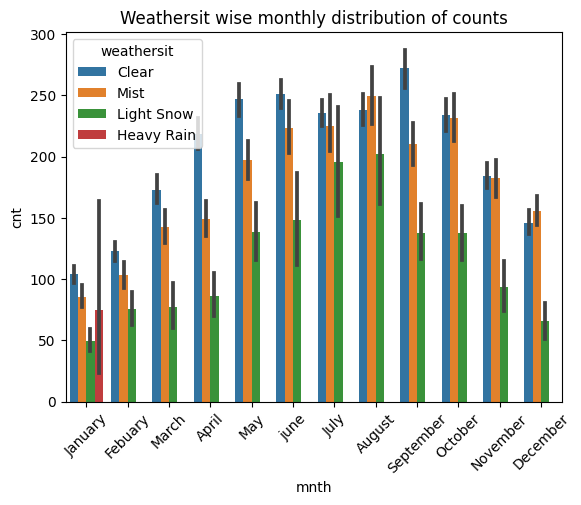

In [ ]:
sb.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','weathersit']],hue='weathersit')
plt.xticks(rotation=45)
plt.title('Weathersit wise monthly distribution of counts')
plt.show()

*   **The above barplot gives us the idea about Weathersit wise monthly distribution of counts  rental bikes.**

<ipython-input-233-64850f40b9c2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), cmap='viridis', annot=True, cbar=True)


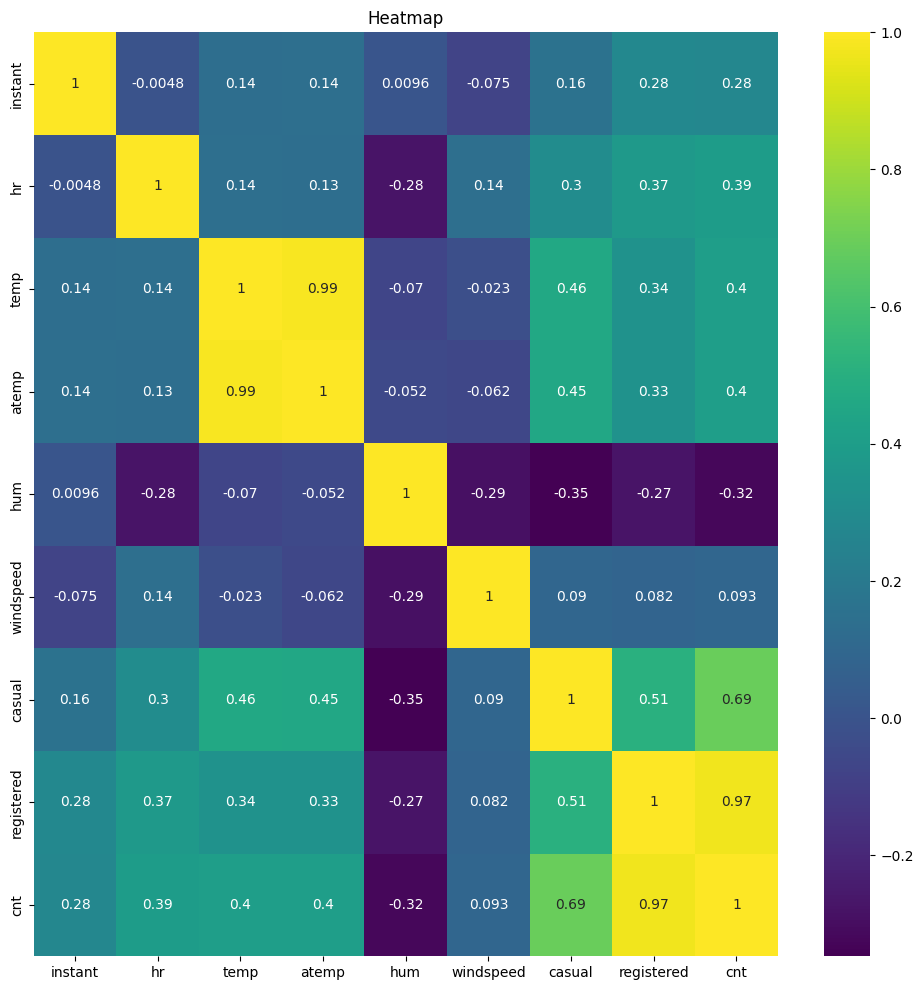

In [ ]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr(), cmap='viridis', annot=True, cbar=True)
plt.title('Heatmap')
plt.show()

*   **Correlation heatmaps are used to analyze the correlation between different variables in a dataset.**




In [ ]:
# sb.pairplot(df,hue='hum')

*   **Pairplots are used to analyze the relationship between multiple variables in a dataset.**

## **2.Bivariate Analysis.**



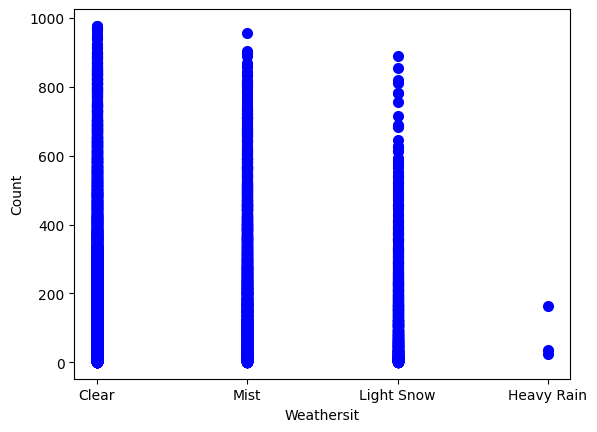

In [ ]:
plt.scatter(df['weathersit'], df['cnt'], c ="blue",
            linewidths = 2)
plt.xlabel('Weathersit')
plt.ylabel('Count')
plt.show()

*   **The above line plot gives us the idea about the trend between weathersit and cnt variables.**

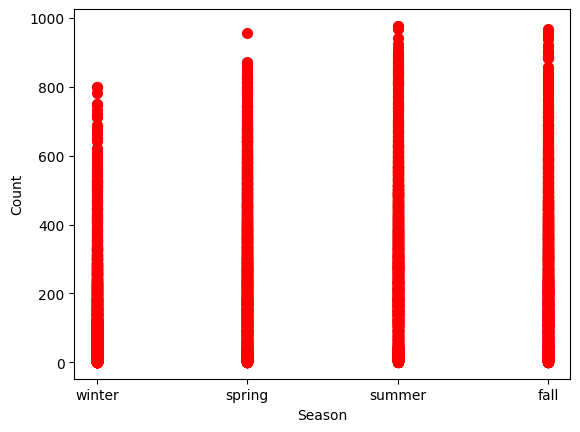

In [ ]:
plt.scatter(df['season'], df['cnt'], c ="red",
            linewidths = 2)
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

*   **The above line plot gives us the idea about the trend between season and cnt variables.**

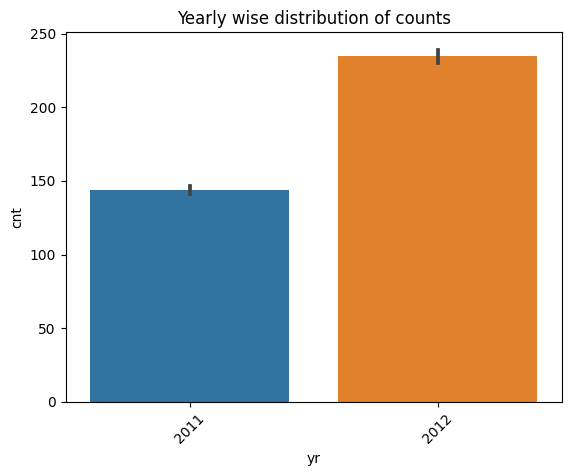

In [ ]:
sb.barplot(x='yr',y='cnt',data=df[['yr','cnt']])
plt.xticks(rotation=45)
plt.title('Yearly wise distribution of counts')
plt.show()

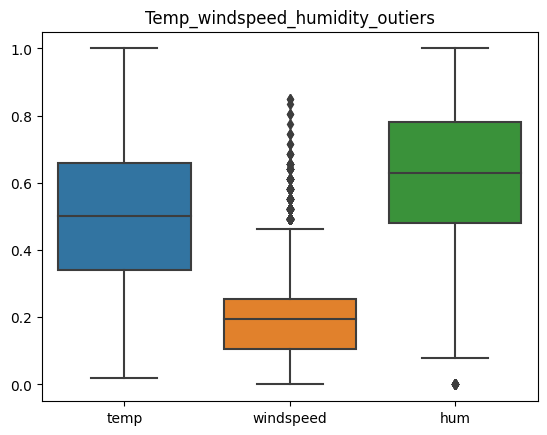

In [ ]:
sb.boxplot(data=df[['temp','windspeed','hum']])
plt.title('Temp_windspeed_humidity_outiers')
plt.show()

*   **The above bar plot gives us the idea about the year wise distribution of count of rental bikes.**

# Dummy Variable Encoding

In [ ]:
a=df.drop(['dteday','weekday','instant','atemp'],axis=1)
x=pd.get_dummies(a,drop_first=True)
print(x)


       hr  temp   hum  windspeed  casual  registered  cnt  season_spring  \
0       0  0.24  0.81     0.0000       3          13   16              0   
1       1  0.22  0.80     0.0000       8          32   40              0   
2       2  0.22  0.80     0.0000       5          27   32              0   
3       3  0.24  0.75     0.0000       3          10   13              0   
4       4  0.24  0.75     0.0000       0           1    1              0   
...    ..   ...   ...        ...     ...         ...  ...            ...   
17374  19  0.26  0.60     0.1642      11         108  119              0   
17375  20  0.26  0.60     0.1642       8          81   89              0   
17376  21  0.26  0.60     0.1642       7          83   90              0   
17377  22  0.26  0.56     0.1343      13          48   61              0   
17378  23  0.26  0.65     0.1343      12          37   49              0   

       season_summer  season_fall  ...  mnth_August  mnth_September  \
0               

In [ ]:
df=pd.DataFrame(x)
df.head()

,hr,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_fall,...,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,holiday_Holiday,workingday_Working day,weathersit_Mist,weathersit_Light Snow,weathersit_Heavy Rain
0,0,0.24,0.81,0.0,3,13,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.22,0.80,0.0,8,32,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.22,0.80,0.0,5,27,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.24,0.75,0.0,3,10,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0.24,0.75,0.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['hr']

0         0
1         1
2         2
3         3
4         4
         ..
17374    19
17375    20
17376    21
17377    22
17378    23
Name: hr, Length: 17379, dtype: int64

In [ ]:
df['hr'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],0, inplace=True)
df['hr']


0         0
1         0
2         0
3         0
4         0
         ..
17374    19
17375    20
17376    21
17377    22
17378    23
Name: hr, Length: 17379, dtype: int64

In [ ]:
df['hr'].replace([13,14,15,16,17,18,19,20,21,22,23,24],1, inplace=True)
df['hr']


0        0
1        0
2        0
3        0
4        0
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: hr, Length: 17379, dtype: int64

In [ ]:
df

,hr,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_fall,...,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,holiday_Holiday,workingday_Working day,weathersit_Mist,weathersit_Light Snow,weathersit_Heavy Rain
0,0,0.24,0.81,0.0000,3,13,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.22,0.80,0.0000,8,32,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.22,0.80,0.0000,5,27,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.24,0.75,0.0000,3,10,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.24,0.75,0.0000,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0.26,0.60,0.1642,11,108,119,0,0,0,...,0,0,0,0,1,0,1,1,0,0
17375,1,0.26,0.60,0.1642,8,81,89,0,0,0,...,0,0,0,0,1,0,1,1,0,0
17376,1,0.26,0.60,0.1642,7,83,90,0,0,0,...,0,0,0,0,1,0,1,0,0,0
17377,1,0.26,0.56,0.1343,13,48,61,0,0,0,...,0,0,0,0,1,0,1,0,0,0


##Model building

In [ ]:
X = df.drop(['cnt'] , axis = 1 )
y = df['cnt']

In [ ]:
X.describe()

,hr,temp,hum,windspeed,casual,registered,season_spring,season_summer,season_fall,yr_2012,...,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,holiday_Holiday,workingday_Working day,weathersit_Mist,weathersit_Light Snow,weathersit_Heavy Rain
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.461189,0.496987,0.627229,0.190098,35.676218,153.786869,0.253697,0.258703,0.243512,0.502561,...,0.084873,0.082686,0.083492,0.082686,0.085333,0.028770,0.682721,0.261465,0.081650,0.000173
std,0.498506,0.192556,0.192930,0.122340,49.305030,151.357286,0.435139,0.437935,0.429214,0.500008,...,0.278700,0.275415,0.276632,0.275415,0.279384,0.167165,0.465431,0.439445,0.273839,0.013138
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.340000,0.480000,0.104500,4.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,0.630000,0.194000,17.000000,115.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.660000,0.780000,0.253700,48.000000,220.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# #Checking for Mutlicollinearity
# # Import library for VIF
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range((X).shape[1])]
#     vif = vif.sort_values(by = "VIF", ascending = False)

#     return(vif)

# calc_vif((X))

In [ ]:
# Importing  DecisionTreeClassifier model from scikit learn library
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state =49)
x_train.shape, x_test.shape

((11296, 27), (6083, 27))

###DecisionTree


In [ ]:
# Creating an instance of a LinearRegression() model named model
model1=DecisionTreeRegressor()

# Fitting the lm model with training set
model1.fit(x_train,y_train)
# Predicting the y values by using the .predict() function
y_pred = model1.predict(x_test)
y_pred


array([423.,  22., 163., ...,  10., 447., 115.])

In [ ]:
model1.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Model performance
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.03386486930790728
RMSE: 0.2664912569014822
R2 score: 0.9999977760091524


## Linear Regression

In [ ]:
# Importing LinearRegression model from scikit learn library
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Creating an instance of a LinearRegression() model named model2
model2 = LinearRegression()
# Fitting the  model with training set
model2.fit(x_train,y_train)
# Predicting the y values by using the .predict() function
y_pred = model2.predict(x_test)
y_pred

array([423.,  22., 163., ...,  10., 447., 115.])

In [ ]:
model2.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Model performance
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 7.1132352387441e-14
RMSE: 9.246504044246011e-14
R2 score: 1.0


##Ridge Regression


In [ ]:
# Importing RidgeRegression model from scikit learn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#Create Ridge Regression Model
ridge_reg= Ridge()
#Train the model
ridge_reg.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = ridge_reg.predict(x_test)
y_pred

array([422.9999996 ,  22.00000013, 162.99999927, ...,  10.00000084,
       446.99999964, 115.00000003])

In [ ]:
# Model performance
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 5.72225082283913e-07
RMSE: 8.437939066183747e-07
R2 score: 1.0


##Support vector machine (svm)

In [ ]:
# Importing SVR model from scikit learn library
from sklearn.svm import SVR
from sklearn import metrics

In [ ]:
# Creating an instance of a SVR() model named svr
svr = SVR(kernel = 'linear')


In [ ]:
# Fitting the svr model with training set
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = svr.predict(x_test)
y_pred

array([423.03474739,  22.09556792, 163.0707706 , ...,  10.09809307,
       447.06591547, 115.08362069])

In [ ]:
# Model performance
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.07495998457801951
RMSE: 0.07895593307867806
R2 score: 0.9999998047744721


##Random forest


In [ ]:
# Importing RandomForestRegressor model from scikit learn library
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# Creating an instance of a RandomForestRegressor() model named random_forest_regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=1)

In [ ]:
# Fitting the clf model with training set
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = random_forest_regressor.predict(x_test)
y_pred

array([422.98,  22.  , 163.  , ...,  10.  , 447.02, 115.  ])

In [ ]:
# Model performance
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.0314236396514867
RMSE: 0.22919392158304083
R2 score: 0.9999983549721438


##KNN

In [ ]:
# Importing KNeighborsRegressor model from scikit learn library
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [ ]:
# Creating an instance of a KNeighborsRegressor() model named knn
knn = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# Fit the model to the training data
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = knn.predict(x_test)
y_pred

array([424.6,  22. , 163. , ...,  10.4, 446.2, 114.8])

In [ ]:
# Model performance
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.6996547756041424
RMSE: 1.7458171988866202
R2 score: 0.9999045524905724


##XG Boost

In [ ]:
# Importing GradientBoostingRegressor model from scikit learn library
from xgboost import XGBRegressor


In [ ]:
# Creating an instance of a XGBRegressor() model named xg
xgboost= XGBRegressor(n_estimators=1000, learning_rate=0.05)
# Fit the model to the training data
xgboost.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = xgboost.predict(x_test)
y_pred

array([420.32642 ,  21.978916, 162.90312 , ...,  10.014204, 448.11688 ,
       114.879364], dtype=float32)

In [ ]:
# Model performance
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.8213637509805365
RMSE: 2.412978864562698
R2 score: 0.9998176632955367


##Ada boosting


In [ ]:
# Importing AdaBoostRegressor model from scikit learn library
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Create a AdaboostRegressor model
adaboost= AdaBoostRegressor(n_estimators=1000)
# Train the model
adaboost.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = adaboost.predict(x_test)
y_pred
# Model performance
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 10.508291040337502
RMSE: 13.103733880392314
R2 score: 0.9946227875632634


##Gradient Boosting

In [ ]:
# Importing GradientBoostingRegressor model from scikit learn library
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Creating an instance of a GradientBoostingRegressor() model named gbr
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

In [ ]:
# Fit the model to the training data
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = gbr.predict(x_test)
y_pred

array([424.9945093 ,  22.51828312, 164.85537967, ...,  10.03113302,
       447.53936362, 116.95012504])

In [ ]:
# Model performance
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.997048768778305
RMSE: 1.4896407144875499
R2 score: 0.9999305087485307


##Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalize the data (important for neural networks)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
#Build neural network model
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='linear', input_shape=(x_train.shape[1],)),
        layers.Dense(32, activation='linear'),
        layers.Dense(1) #No activation for Regression
    ])

    #Compile the model
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()

In [ ]:
#Train the model
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
283/283 - 1s - loss: 43143.1523 - mae: 165.3378 - val_loss: 38052.3555 - val_mae: 118.7553 - 823ms/epoch - 3ms/step
Epoch 2/30
283/283 - 0s - loss: 3153.8076 - mae: 34.1457 - val_loss: 146959.4531 - val_mae: 10.2820 - 469ms/epoch - 2ms/step
Epoch 3/30
283/283 - 0s - loss: 4.6276 - mae: 1.4685 - val_loss: 146742.6875 - val_mae: 8.7805 - 459ms/epoch - 2ms/step
Epoch 4/30
283/283 - 0s - loss: 4.3315 - mae: 1.4063 - val_loss: 145489.6406 - val_mae: 9.5409 - 464ms/epoch - 2ms/step
Epoch 5/30
283/283 - 0s - loss: 4.2751 - mae: 1.3919 - val_loss: 148193.4375 - val_mae: 11.3287 - 393ms/epoch - 1ms/step
Epoch 6/30
283/283 - 0s - loss: 4.5149 - mae: 1.3617 - val_loss: 147583.7812 - val_mae: 10.3396 - 448ms/epoch - 2ms/step
Epoch 7/30
283/283 - 0s - loss: 4.4416 - mae: 1.3405 - val_loss: 147223.3906 - val_mae: 9.8047 - 448ms/epoch - 2ms/step
Epoch 8/30
283/283 - 0s - loss: 4.3366 - mae: 1.3382 - val_loss: 145103.7656 - val_mae: 10.1254 - 380ms/epoch - 1ms/step
Epoch 9/30
283/283 - 0s -

In [ ]:
#Evaluate the model
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
print(f"Test MSE: {test_mse_score}\n Test MAE: {test_mae_score}")

191/191 [==============================] - 0s 1ms/step - loss: 108885.4453 - mae: 6.2129
Test MSE: 108885.4453125
 Test MAE: 6.212932109832764


In [ ]:
#Make predictions
predictions = model.predict(x_test)
print(predictions.flatten())

191/191 [==============================] - 0s 987us/step
[422.93954   21.694937 163.10019  ...   9.55321  446.9786   115.13184 ]


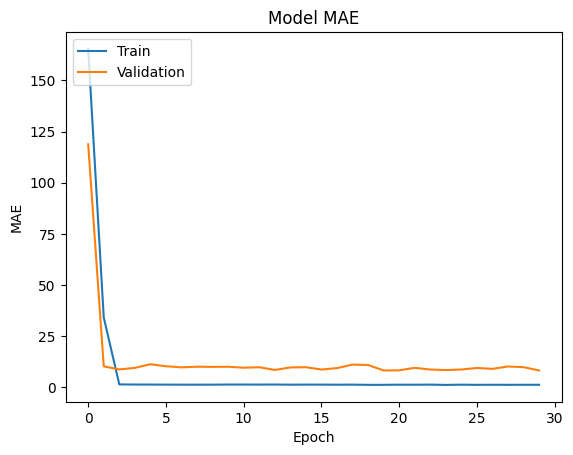

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


191/191 [==============================] - 0s 1ms/step


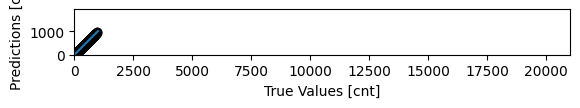

In [ ]:
# Make predictions
predictions = model.predict(x_test).flatten()

# Plotting true labels vs predicted labels
plt.scatter(y_test, predictions, color = 'black')
plt.xlabel('True Values [cnt]')
plt.ylabel('Predictions [cnt]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
range = plt.plot([-1000, 1000], [-1000, 1000])

# plt.legend()
plt.show()